In [4]:
import random

In [5]:
#pemetaan {kotak awal:kotak akhir}
ular_tangga = {
    1:38,
    4:14,
    8:30,
    21:42,
    28:76,
    50:67,
    71:92,
    80:99,
    97:78,
    95:56,
    88:24,
    62:18,
    48:26,
    36:6,
    32:10
}

In [6]:
def Simulasi():
    
    #mulai dari kotak 0 (di luar papan)
    kotak = 0
    #mulai dari 0 jumlah gerakan
    gerakan = 0

    #selama belum mencapai kotak 100, yang di bawah ini akan terus diulang
    while kotak < 100: 
        
        #pilih angka acak 1-6
        kocokan = random.randint(1,6)

        if kotak + kocokan > 100:
            continue

        #tambahkan angka yang didapat ke nomor kotak sekarang
        kotak += kocokan

        #tambah 1 jumlah gerakan
        gerakan += 1

        #periksa apakah mendarat di ular/tangga
        #jika ya, pindahkan ke kotak yang bersangkutan
        kotak = ular_tangga.get(kotak, kotak)

    #beritahu berapa gerakan yang dibutuhkan hingga mencapai kotak 100
    return gerakan 

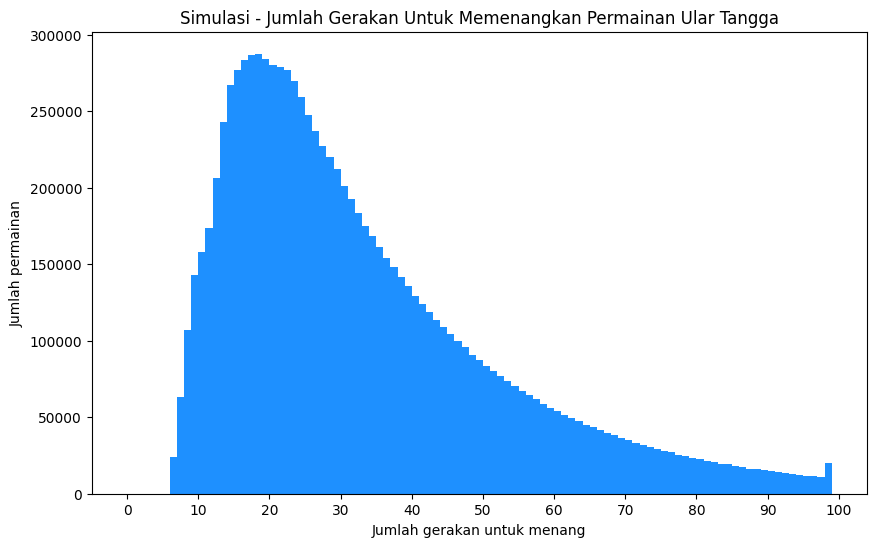

In [7]:
#jalankan simulasi tiga puluh juta kali
simulasi = [Simulasi() for i in range(10000000)]

#masukkan modul/alat untuk membuat grafik
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#tentukan ukuran grafik
plt.figure(figsize=(10,6))

#gambar grafik: jangkauan sumbu x = 200, warna biru, penulisan di tengah
plt.hist(simulasi, bins=range(100), color='dodgerblue', align = 'mid')

#nilai sumbu x ditulis setiap kelipatan 10
plt.xticks(np.arange(0, 110, 10.0))

#beri judul serta deskripsi sumbu x dan y 
plt.title('Simulasi - Jumlah Gerakan Untuk Memenangkan Permainan Ular Tangga')
plt.xlabel('Jumlah gerakan untuk menang')
plt.ylabel('Jumlah permainan')

#tampilkan grafik
plt.show()

In [8]:
jumlah = len(simulasi) #dapatkan jumlah gerakan
total = sum(simulasi) #dapatkan total semua gerakan

rataan = total/jumlah #rumus mencari rataan
print('Rata-rata = ', rataan) #tampilkan rataan gerakan

simulasi.sort() #urutkan angka dari terkecil
#karena jumlah angka genap, cari 2 angka di tengah
#lalu rata-ratakan 2 angka itu
median1 = simulasi[jumlah//2] 
median2 = simulasi[jumlah//2 - 1]
median = (median1 + median2)/2
print('Median = ', median) #tampilkan median

#masukkan alat untuk menghitung berapa kali
#angka tertentu muncul dalam sebuah data
from collections import Counter
kemunculan = Counter(simulasi)
cari_modus = dict(kemunculan)
#cari angka yang paling sering muncul
paling_sering = (max(list(kemunculan.values())))
modus = [i for i, v in kemunculan.items()
         if v == paling_sering]
#tampilkan modus dan berapa kali muncul
print('Modus = ', modus, 'sebanyak', paling_sering)

#mencari nilai minimum dan maksimum
minimum = min(simulasi)
maximum = max(simulasi)
print('Jumlah Gerakan Paling Sedikit = ', minimum)
print('Jumlah Gerakan Paling Banyak = ', maximum)

Rata-rata =  34.596805
Median =  28.0
Modus =  [18] sebanyak 287488
Jumlah Gerakan Paling Sedikit =  6
Jumlah Gerakan Paling Banyak =  466


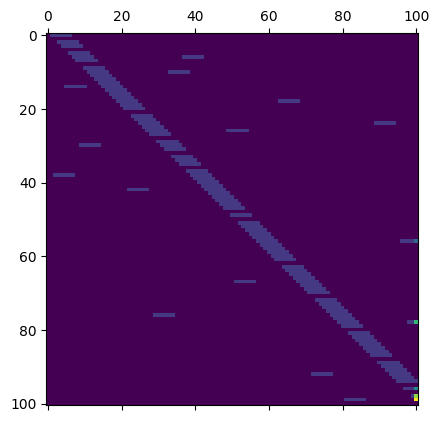

In [9]:
def Markov():

    #buat matriks 101x101 berisikan '0' semua
    matriks = np.zeros((101,101))

    #petakan kemungkinan 1/6 pada matriks
    #menganggap tidak ada ular atau tangga
    for i in range(1, 101):  
        matriks[i-1,i:i+6] = 1/6

    #menambahkan aturan bahwa angka yang tepat
    #tidak diperlukan untuk menang, melainkan minimal saja
    matriks[95:100,100] += np.linspace(1/6, 5/6, 5)

    #menambahkan ular dan tangganya
    #dilakukan dengan mengekstrak data ular tangga dahulu
    transisi2 = [ular_tangga.get(i,i) for i in range(101)]

    #kemudian menggabungkan dengan matriks pertama
    transisi1 = np.zeros((101,101))
    transisi1[transisi2, range(101)] = 1

    #kembalikan data matriksnya
    return transisi1 @ matriks

#jalankan fungsinya dan visualisasikan
plt.matshow(Markov())

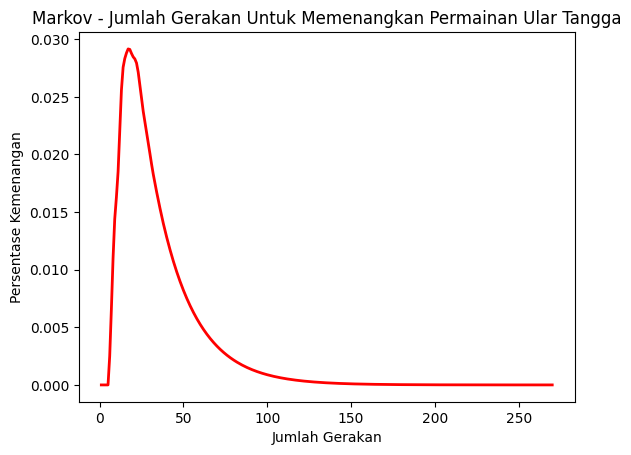

In [10]:
ular = [(97,78),
    (95,56),
    (88,24),
    (62,18),
    (48,26),
    (36,6),
    (32,10)]

tangga = [(1,38),
    (4,14),
    (8,30),
    (21,42),
    (28,76),
    (50,67),
    (71,92),
    (80,99)]

transisi = ular + tangga

T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

for (i1,i2) in transisi:
    iw = np.where(T[:,i1] > 0)
    T[:,i1] = 0
    T[iw,i2] += 1/6

T[95:100,100] += np.linspace(1/6, 5/6, 5)
for ular in ular:
    T[ular,100] = 0

v = np.zeros(101)
v[0] = 1

n, P = 0, []
probabilitas = 0

while probabilitas < 0.99999:
    n += 1
    v = v.dot(T)
    P.append(v[100])
    probabilitas += P[-1]

plt.plot(np.linspace(1,n,n), P, 'r-', lw=2, alpha=1, label='Markov')
plt.title('Markov - Jumlah Gerakan Untuk Memenangkan Permainan Ular Tangga')
plt.xlabel('Jumlah Gerakan')
plt.ylabel('Persentase Kemenangan')
plt.show()

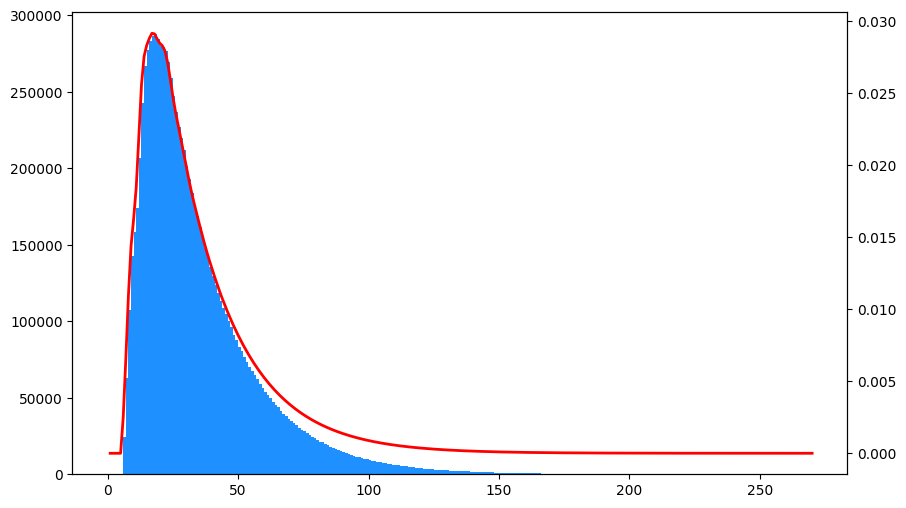

In [11]:
plt.figure(figsize=(10,6))
ax1 = plt.subplot(1,1,1)
ax1.hist(simulasi, bins=range(200), color='dodgerblue', align = 'mid')

ax2 = ax1.twinx()
ax2.plot(np.linspace(1,n,n), P, 'r-', lw=2, alpha=1, label='Markov')